# The Golden Ratio Flower

This post is based on the Numberphile video: <a href="https://www.youtube.com/watch?v=sj8Sg8qnjOg&t=334s" target = "_blank">The Golden Ratio (why it is so irrational)</a>. I really recommend watching the video first if you have the time!

The basis of this post and the Numberphile video is the <a href="https://en.wikipedia.org/wiki/Golden_ratio" target="_blank">Golden Ratio</a>: φ = (1 + √5) / 2.

The Numberphile video starts with how to mathematically model seed positions in a flower by specifying a certain number of turns to rotate in between seed placements. When the specified number of turns are rational numbers (for example 10 turns per 360 degrees) the seeds are arranged neatly along a corresponding number of spokes (10 spokes for 10 turns). On the other hand, when the specified number of turns are irrational numbers (for example φ turns per 360 degrees), the spokes lose their structure and the seed placements lose their neatness and are dispersed throughout the flower (you cannot get φ spokes!). In this post, we will explore how to generate seed placements in Python!

Despite the complex patterns involved, the code itself is simple and short, so here it is:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

phi = (1 + np.sqrt(5)) / 2.0 # golden ratio

def golden_ratio_flower(nturns = np.pi, ntries = None):
    # NTURNS = number of turns to use in 360 degrees
    NTRIES = ntries or int(nturns * 100) 
    theta = 360.0 / nturns #originally in degrees
    theta = theta * np.pi / 180.0 #convert to radians
    # rotation matrix:
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]]) 
    x = [] # empty lists to hold the data
    y = []
    D = 1 #distance increase for new seed
    # Choose starting point to be [1,0]
    x.append(D) 
    y.append(0) 
    # L is the scaling factor. 
    # Seeds cannot lie on top of each other!
    L = 1 
    count = 0
    for i in range(NTRIES):
        [X, Y] = np.dot(R, np.array([x[i], y[i]]))
        count = count + 1
        if count >= nturns:
            count = 0
            L = L + D
            [X, Y] = np.dot(L * np.eye(2), 
                     np.array([X, Y]) / 
                     np.sqrt(X**2 + Y**2))
        x.append(X)
        y.append(Y) 
        
    #plt.figure(figsize = (8, 8))    
    plt.plot(x, y, 'o')
    plt.axis('equal')
    plt.axis('off')
    plt.show()

The algorithm used is relatively straightforward, and we will explore only the most important sections of the code. The function `golden_ratio_flower` takes 2 arguments: `nturns` is the number of turns to make in 360 degrees, and `ntries` is the total number of iterations to execute. From `nturns` we calculate the angle per turn `theta`, as well as the two dimensional rotation matrix `R`. The rotation matrix will be used to rotate the position of the seeds in the flower.

After some other preparations, we begin the iterative process to arrange the seeds in the flower. From the previous seed position `x[i], y[i]`, we calculate the next seed position by performing a rotation on the old coordinates: `[X, Y] = np.dot(R, np.array([x[i], y[i]]))` and place a seed there. When we complete a full rotation around the centre of the flower, we extend one step outwards with `L = L + D` and `[X, Y] = np.dot(L * np.eye(2), np.array([X, Y]) / np.sqrt(X**2 + Y**2))` as seeds cannot lie on top of each other! We then repeat the rotation process again until we place the desired number of seeds.

When we use a 10 turns, we get a flower where the seeds are arranged neatly in 10 spokes! This is because after 10 turns, we always return to the original starting location. Despite the neat arrangement, I believe you would agree that this sort of arrangement wastes a lot of space. 

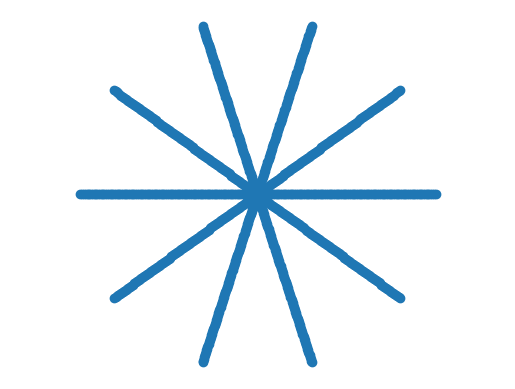

In [2]:
golden_ratio_flower(nturns = 10)

As mentioned earlier, if we use an irrational number of turns, we lose the spoke structure. Using an irrational number of turns means that we never return to the same location twice, and the neat periodic structure seen above is lost. For example, using the Golden Ratio φ results in something that looks like an actual sun flower! This arrangement makes much more effective use of space than the previous example!

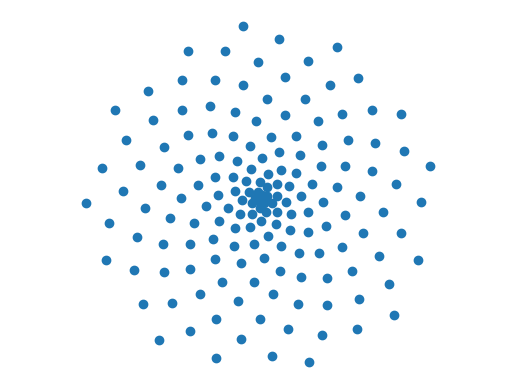

In [3]:
golden_ratio_flower(nturns = phi)

The Numberphile video also explores what happens if you use π turns. As with the Golden Ratio, π is also an irrational number.  Therefore we would expect the seeds to not exhibit neatly arranged spokes. However, it turns out that we get something which exhibits both the periodic nature of neatly arranged spokes, as well as the aperiodic nature of using an irrational number of turns!

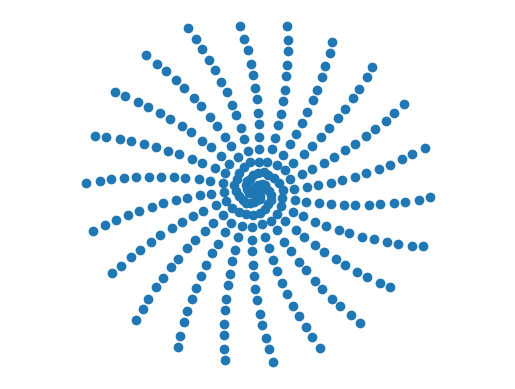

In [4]:
golden_ratio_flower(nturns = np.pi)

As mentioned in the Numberphile video, this is because π is not as "irrational" as the Golden Ratio, and can be approximated quite accurately using certain rational numbers such as 3 and 22/7. Therefore, we get 3 spokes near the centre of the flower, and 22 spokes on the outside. 

This algorithm to place seeds is actually a very useful technique to visualise the properties of irrational numbers. For example, the <a href="https://en.wikipedia.org/wiki/Supergolden_ratio" target = "_blank">Supergolden Ratio</a> is given as an extremely complicated algebraic expression which is really hard to follow. However, its corresponding seed pattern is actually quite simple!

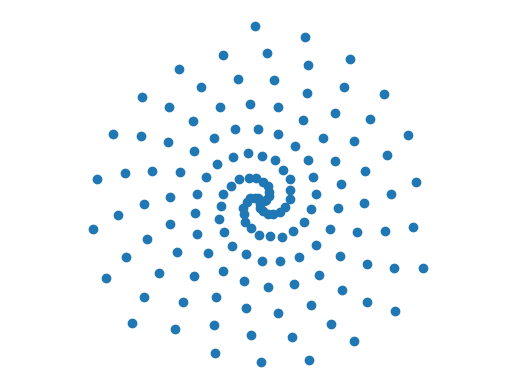

In [5]:
super_golden_ratio = (1 + ((29+3*np.sqrt(93))/2)**(1/3) + ((29-3*np.sqrt(93))/2)**(1/3)) / 3
golden_ratio_flower(nturns = super_golden_ratio)

We have 22 outer spokes and 3 inner spokes. The reasons for this are different from π however. It turns out that the Supergolden Ratio can be approximated by 22/15 or 3/2.

Now that you know how seed patterns are easily generated, explore some other irrational numbers for yourself! Thank you for reading!